In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import utils
import copy

from qboard import QBoard
from matplotlib import patches

In [2]:
df_raw = pd.read_parquet('LorentzAttractor.parquet')
df_train = df_raw.iloc[:int(df_raw.shape[0]//6), :]
df_test = df_raw.iloc[int(df_raw.shape[0]//6):, :]
labels = df_test.label.values

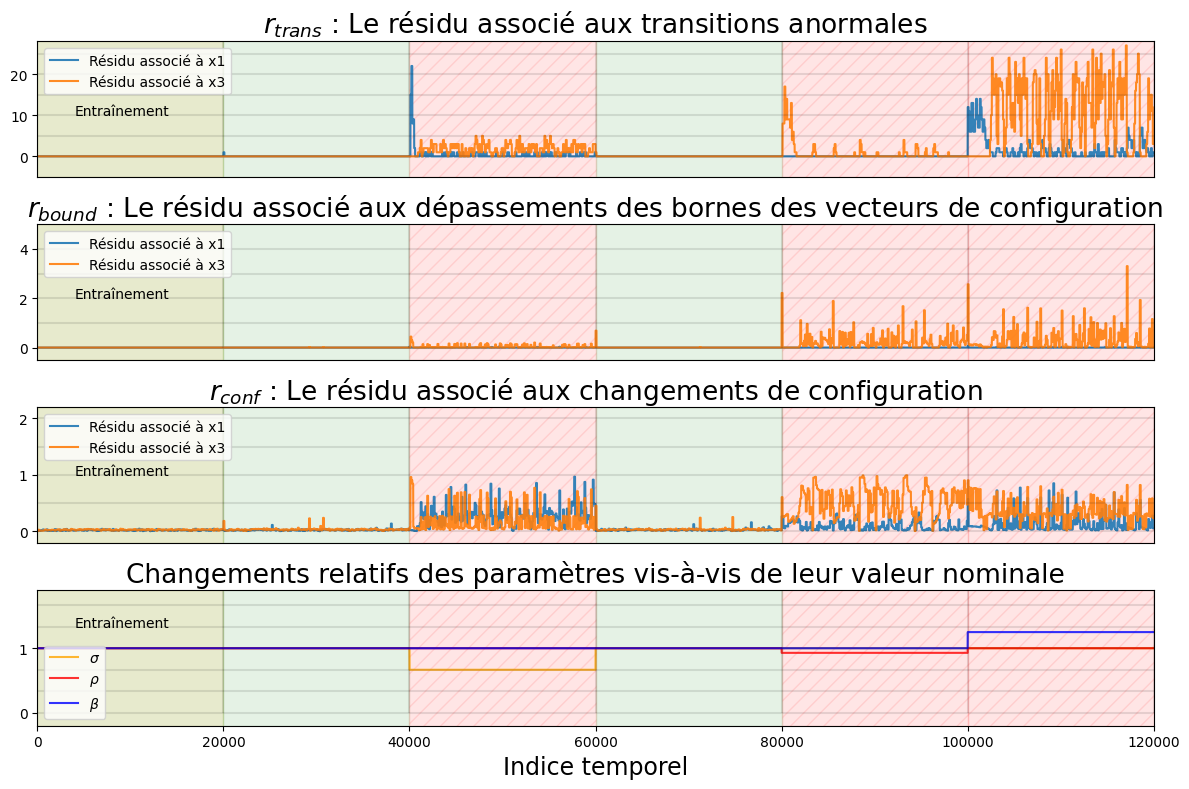

In [3]:
model = QBoard(
    n_quantiles=20,
    transition_length=20,
    correlation_threshold=0.95,
    bound_threshold=1,
    nu=1,
    window_size=100,
    n_clusters=500
)
model.fit(df_train)
res_train = model.predict(df_train)
res = model.predict(df_test)

x_1_trans = np.concatenate([res_train[:, 2], res[:, 2]])
x_3_trans = np.concatenate([res_train[:, 5], res[:, 5]])


sig = [1]*40000 + [8/12]*20000 + [1]*60000
rho = [1]*80000 + [26/28]*20000 + [1]*20000
beta = [1]*100000 + [10/8]*20000

plt.figure(figsize=(12,8))
plt.subplot(4, 1, 1)
plt.plot(x_1_trans, label='Résidu associé à x1', alpha=0.9, color='C0')
plt.plot(x_3_trans, label='Résidu associé à x3', alpha=0.9, color='C1')
plt.axvspan(0,20000, color='green', alpha=0.1)
plt.axvspan(0,20000, color='Orange', alpha=0.1)
plt.axvspan(20000,40000, color='green', alpha=0.1)
plt.axvspan(40000,60000, color='red', alpha=0.1, hatch='//')
plt.axvspan(60000,80000, color='green', alpha=0.1)
plt.axvspan(80000,100000, color='red', alpha=0.1, hatch='//')
plt.axvspan(100000,120000, color='red', alpha=0.1, hatch='//')
for i in range(7):
    plt.vlines(i * 20000, 0, ymax=50, color='black', alpha=0.1)
plt.hlines(0, 0, 120000, color='black', alpha=0.1)
plt.hlines(5, 0, 120000, color='black', alpha=0.1)
plt.hlines(10, 0, 120000, color='black', alpha=0.1)
plt.hlines(15, 0, 120000, color='black', alpha=0.1)
plt.hlines(20, 0, 120000, color='black', alpha=0.1)
plt.hlines(25, 0, 120000, color='black', alpha=0.1)
plt.ylim([-5, 28])
plt.xlim([0,120000])
plt.text(20000/5, 10, 'Entraînement')
plt.xticks([])

plt.legend(loc='upper left') 
plt.title(r'$r_{trans}$ : Le résidu associé aux transitions anormales', fontsize=19)

x_1_bound = np.concatenate([res_train[:, 0], res[:, 0]])
x_3_bound = np.concatenate([res_train[:, 3], res[:, 3]])

plt.subplot(4, 1, 2)
plt.plot(x_1_bound, label='Résidu associé à x1', alpha=0.9, color='C0')
plt.plot(x_3_bound, label='Résidu associé à x3', alpha=0.9, color='C1')
plt.axvspan(0,20000, color='green', alpha=0.1)
plt.axvspan(0,20000, color='Orange', alpha=0.1)
plt.axvspan(20000,40000, color='green', alpha=0.1)
plt.axvspan(40000,60000, color='red', alpha=0.1, hatch='//')
plt.axvspan(60000,80000, color='green', alpha=0.1)
plt.axvspan(80000,100000, color='red', alpha=0.1, hatch='//')
plt.axvspan(100000,120000, color='red', alpha=0.1, hatch='//')
for i in range(7):
    plt.vlines(i * 20000, 0, ymax=50, color='black', alpha=0.1)
plt.hlines(0, 0, 120000, color='black', alpha=0.1)
plt.hlines(1, 0, 120000, color='black', alpha=0.1)
plt.hlines(2, 0, 120000, color='black', alpha=0.1)
plt.hlines(3, 0, 120000, color='black', alpha=0.1)
plt.hlines(4, 0, 120000, color='black', alpha=0.1)
plt.ylim([-0.5, 5])
plt.xlim([0,120000])
plt.text(20000/5, 2, 'Entraînement')
plt.xticks([])

plt.legend(loc='upper left') 
plt.title(r'$r_{bound}$ : Le résidu associé aux dépassements des bornes des vecteurs de configuration', fontsize=19)

x_1_corr = np.concatenate([res_train[:, 1], res[:, 1]])
x_3_corr = np.concatenate([res_train[:, 4], res[:, 4]])

plt.subplot(4, 1, 3)
plt.plot(x_1_corr, label='Résidu associé à x1', alpha=0.9, color='C0')
plt.plot(x_3_corr, label='Résidu associé à x3', alpha=0.9, color='C1')
plt.axvspan(0,20000, color='green', alpha=0.1)
plt.axvspan(0,20000, color='Orange', alpha=0.1)
plt.axvspan(20000,40000, color='green', alpha=0.1)
plt.axvspan(40000,60000, color='red', alpha=0.1, hatch='//')
plt.axvspan(60000,80000, color='green', alpha=0.1)
plt.axvspan(80000,100000, color='red', alpha=0.1, hatch='//')
plt.axvspan(100000,120000, color='red', alpha=0.1, hatch='//')
for i in range(7):
    plt.vlines(i * 20000, 0, ymax=50, color='black', alpha=0.1)
plt.hlines(0, 0, 120000, color='black', alpha=0.1)
plt.hlines(0.5, 0, 120000, color='black', alpha=0.1)
plt.hlines(1, 0, 120000, color='black', alpha=0.1)
plt.hlines(1.5, 0, 120000, color='black', alpha=0.1)
plt.hlines(2, 0, 120000, color='black', alpha=0.1)
plt.ylim([-0.2, 2.2])
plt.xlim([0,120000])
plt.text(20000/5, 1, 'Entraînement')
plt.xticks([])

plt.legend(loc='upper left') 
plt.title(r'$r_{conf}$ : Le résidu associé aux changements de configuration', fontsize=19)

plt.subplot(4, 1, 4)
plt.plot(sig, label=r'$\sigma$', alpha=0.8, color='orange')
plt.plot(rho, label=r'$\rho$', alpha=0.8, color='red')
plt.plot(beta, label=r'$\beta$', alpha=0.8, color='blue')
plt.axvspan(0,20000, color='green', alpha=0.1)
plt.axvspan(0,20000, color='Orange', alpha=0.1)
plt.axvspan(20000,40000, color='green', alpha=0.1)
plt.axvspan(40000,60000, color='red', alpha=0.1, hatch='//')
plt.axvspan(60000,80000, color='green', alpha=0.1)
plt.axvspan(80000,100000, color='red', alpha=0.1, hatch='//')
plt.axvspan(100000,120000, color='red', alpha=0.1, hatch='//')
for i in range(7):
    plt.vlines(i * 20000, 0, ymax=50, color='black', alpha=0.1)
plt.hlines(0, 0, 120000, color='black', alpha=0.1)
plt.hlines(1/3, 0, 120000, color='black', alpha=0.1)
plt.hlines(2/3, 0, 120000, color='black', alpha=0.1)
plt.hlines(1, 0, 120000, color='black', alpha=0.1)
plt.hlines(4/3, 0, 120000, color='black', alpha=0.1)
plt.hlines(5/3, 0, 120000, color='black', alpha=0.1)
plt.ylim([-0.2, 1.9])
plt.xlim([0,120000])
plt.text(20000/5, 4/3, 'Entraînement')
plt.xticks()
plt.xlabel('Indice temporel', fontsize=17)

plt.legend(loc='lower left') 
plt.title(r'Changements relatifs des paramètres vis-à-vis de leur valeur nominale', fontsize=19)
plt.tight_layout()
# plt.savefig('lorenz_attractor_qboard_res1.png', transparent=True, bbox_inches='tight')
plt.show()

In [4]:
## INCREMENTAL LEARNING

model = QBoard(
    n_quantiles=20,
    transition_length=20,
    correlation_threshold=0.95,
    bound_threshold=1,
    nu=1,
    window_size=100,
    n_clusters=500
)

model.fit(df_train)
res_train = model.predict(df_train)
res_test= model.predict(df_test)
score_train = utils.aggregate_score(res_train, res_train)
score_initial = utils.aggregate_score(res_test, res_train)
score_x1_train = utils.aggregate_score(res_train[:, :3], res_train[:, :3])
score_x1_initial = utils.aggregate_score(res_test[:, :3], res_train[:, :3])
score_x3_train = utils.aggregate_score(res_train[:, 3:], res_train[:, 3:])
score_x3_initial = utils.aggregate_score(res_test[:, 3:], res_train[:, 3:])

model.partial_fit(df_test.iloc[25000:30000])
res_test_ic = model.predict(df_test)
res_train_ic = model.predict(df_train)
score_ic = utils.aggregate_score(res_test_ic, res_train)
score_train_ic = utils.aggregate_score(res_train_ic, res_train)
score_x1_ic= utils.aggregate_score(res_test_ic[:, :3], res_train[:, :3])
score_x1_train_ic= utils.aggregate_score(res_train_ic[:, :3], res_train[:, :3])
score_x3_ic = utils.aggregate_score(res_test_ic[:, 3:], res_train[:, 3:])
score_x3_train_ic = utils.aggregate_score(res_train_ic[:, 3:], res_train[:, 3:])

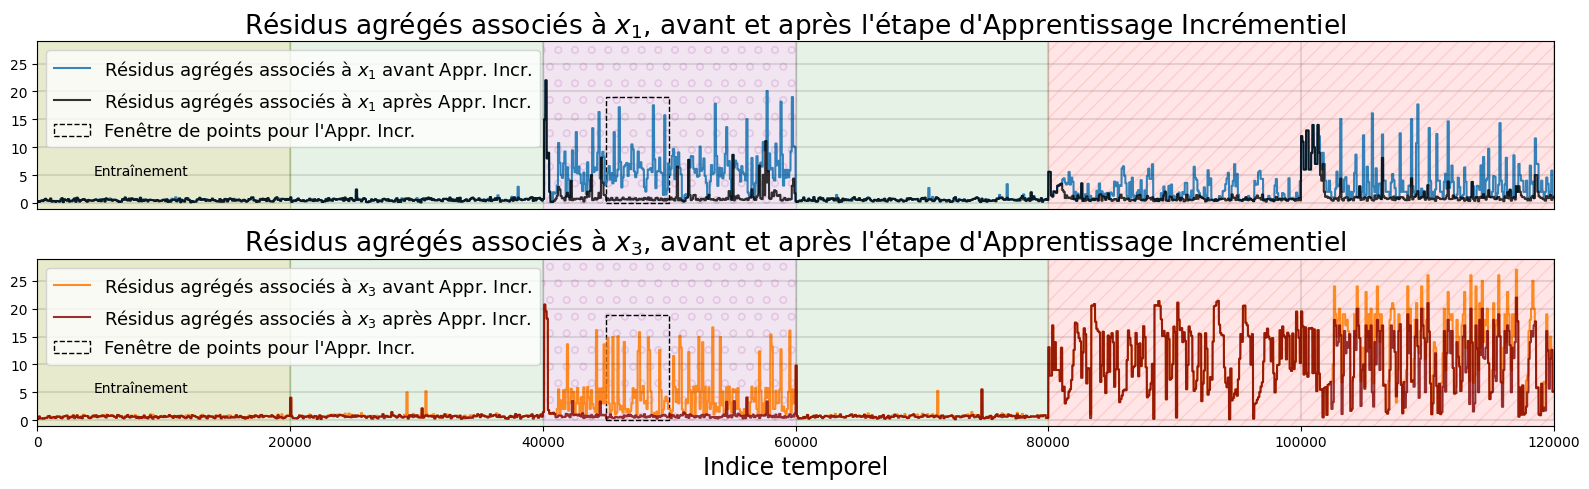

In [5]:
score_x1_all = np.concatenate([score_x1_train, score_x1_initial])
score_x1_ic_all = np.concatenate([score_x1_train_ic, score_x1_ic])
score_x3_all = np.concatenate([score_x3_train, score_x3_initial])
score_x3_ic_all = np.concatenate([score_x3_train_ic, score_x3_ic])

plt.figure(figsize=(16,5))
plt.subplot(2, 1, 1)
plt.plot(score_x1_all, label=r'Résidus agrégés associés à $x_1$ avant Appr. Incr.', alpha=0.9, color='C0')
plt.plot(score_x1_ic_all, label=r'Résidus agrégés associés à $x_1$ après Appr. Incr.', alpha=0.8, color='black')
plt.axvspan(0,20000, color='green', alpha=0.1)
plt.axvspan(0,20000, color='Orange', alpha=0.1)
plt.axvspan(20000,40000, color='green', alpha=0.1)
plt.axvspan(40000,60000, color='purple', alpha=0.1, hatch='o')
plt.axvspan(60000,80000, color='green', alpha=0.1)
plt.axvspan(80000,120000, color='red', alpha=0.1, hatch='//')
for i in range(7):
    plt.vlines(i * 20000, 0, ymax=50, color='black', alpha=0.1)
plt.hlines(0, 0, 120000, color='black', alpha=0.1)
plt.hlines(5, 0, 120000, color='black', alpha=0.1)
plt.hlines(10, 0, 120000, color='black', alpha=0.1)
plt.hlines(15, 0, 120000, color='black', alpha=0.1)
plt.hlines(20, 0, 120000, color='black', alpha=0.1)
plt.hlines(25, 0, 120000, color='black', alpha=0.1)
plt.ylim([-1, 29])
plt.xlim([0,120000])
plt.text(20000/4.5, 5, 'Entraînement')
plt.xticks([])
ax = plt.gca()
ax.add_patch(patches.Rectangle((45000, -0.05), 5000, 19, edgecolor='black',
   facecolor='none', linewidth=1,linestyle='--', label="Fenêtre de points pour l'Appr. Incr."))

plt.legend(loc='upper left', fontsize=13) 
plt.title(r"Résidus agrégés associés à $x_1$, avant et après l'étape d'Apprentissage Incrémentiel", fontsize=19)

plt.subplot(2, 1, 2)
plt.plot(score_x3_all, label=r'Résidus agrégés associés à $x_3$ avant Appr. Incr.', alpha=0.9, color='C1')
plt.plot(score_x3_ic_all, label=r'Résidus agrégés associés à $x_3$ après Appr. Incr.', alpha=0.8, color='maroon')
plt.axvspan(0,20000, color='green', alpha=0.1)
plt.axvspan(0,20000, color='Orange', alpha=0.1)
plt.axvspan(20000,40000, color='green', alpha=0.1)
plt.axvspan(40000,60000, color='purple', alpha=0.1, hatch='o')
plt.axvspan(60000,80000, color='green', alpha=0.1)
plt.axvspan(80000,120000, color='red', alpha=0.1, hatch='//')
for i in range(7):
    plt.vlines(i * 20000, 0, ymax=50, color='black', alpha=0.1)
plt.hlines(0, 0, 120000, color='black', alpha=0.1)
plt.hlines(5, 0, 120000, color='black', alpha=0.1)
plt.hlines(10, 0, 120000, color='black', alpha=0.1)
plt.hlines(15, 0, 120000, color='black', alpha=0.1)
plt.hlines(20, 0, 120000, color='black', alpha=0.1)
plt.hlines(25, 0, 120000, color='black', alpha=0.1)
plt.text(20000/4.5, 5, 'Entraînement')

ax = plt.gca()
ax.add_patch(patches.Rectangle((45000, -0.05), 5000, 19, edgecolor='black',
   facecolor='none', linewidth=1,linestyle='--', label="Fenêtre de points pour l'Appr. Incr."))

plt.ylim([-1, 29])
plt.xlim([0,120000])
plt.legend(loc='upper left', fontsize=13) 
plt.xlabel('Indice temporel', fontsize=17)
plt.title(r"Résidus agrégés associés à $x_3$, avant et après l'étape d'Apprentissage Incrémentiel", fontsize=19)
plt.tight_layout()
# plt.savefig('qboard_IncrLearning_fullpaper_Lorenz_french.png', transparent=True, bbox_inches='tight')
plt.show()

In [6]:
## SKAB 

skab_raw = pd.read_csv('alldata_skab.csv').dropna().reset_index(drop=True)
skab_raw.datetime = pd.to_datetime(skab_raw.datetime)
df_skab = skab_raw.dropna()
df_skab = df_skab.drop(columns=['changepoint']).reset_index(drop=True)
df_skab = df_skab.rename(columns={'anomaly':'label', 'datetime': 'timestamp'})

context_id = np.zeros(df_skab.shape[0])
context_id[11245:14750] = 1
context_id[14750:] = 2
df_skab["context_id"] = context_id

df_skab_c2 = df_skab.loc[df_skab.context_id == 2]   # Context used in Amiral bench
df_skab_train = df_skab_c2.iloc[:int(df_skab_c2.shape[0]*0.30), :]
df_skab_train = df_skab_train.loc[df_skab_train.label == 0]
df_skab_test = df_skab_c2.iloc[int(df_skab_c2.shape[0]*0.30):, :]

label_skab_raw = df_skab_test.label.values

label_skab = np.zeros(label_skab_raw.size)
regions_red = utils.get_events(label_skab_raw)[1]
for region in regions_red:
    label_skab[region[0]+60:region[1]-60] = 1

model = QBoard(
    n_quantiles=8,
    transition_length=20,
    correlation_threshold=0.95,
    bound_threshold=1,
    nu=1,
    window_size=100,
    n_clusters=50
)
model.fit(df_skab_train)
res_train = model.predict(df_skab_train)
res_test = model.predict(df_skab_test)

score_train = utils.aggregate_score(res_train, res_train)
score_initial = utils.aggregate_score(res_test, res_train)

res_bound_Accelerometer1RMS = np.concatenate([res_train[:, 0], res_test[:, 0]])
res_bound_Accelerometer2RMS = np.concatenate([res_train[:, 3], res_test[:, 3]])
res_bound_AccelerometerCurrent = np.concatenate([res_train[:, 6], res_test[:, 6]])
res_bound_AccelerometerTemperature = np.concatenate([res_train[:, 15], res_test[:, 15]])
res_bound_AccelerometerThermocouple = np.concatenate([res_train[:, 12], res_test[:, 12]])
res_bound_AccelerometerVoltage = np.concatenate([res_train[:, 9], res_test[:, 9]])
res_bound_AccelerometerVolume = np.concatenate([res_train[:, 18], res_test[:, 18]])

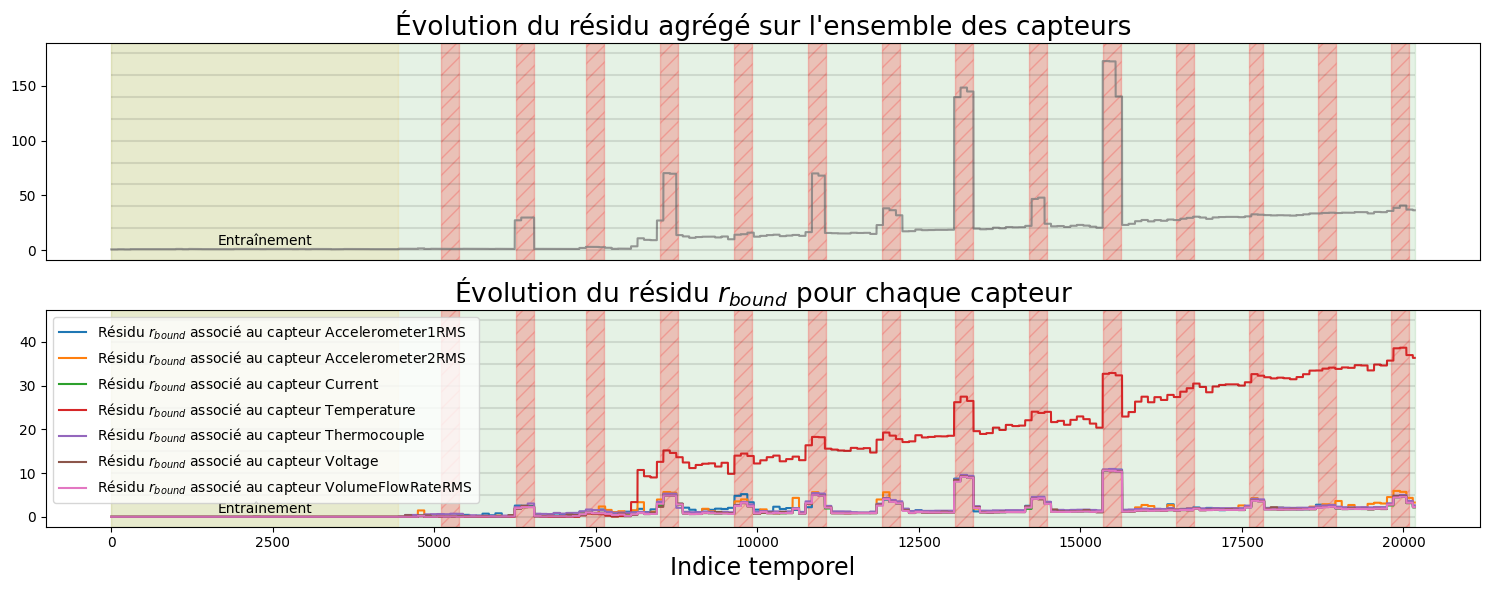

In [7]:
score_overall_initial = np.concatenate([score_train, score_initial])

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(score_overall_initial, color='C7', alpha=0.8)
regions_red = utils.get_events(label_skab)[1]
plt.axvspan(0, score_overall_initial.size, color='green', alpha=0.1)
plt.axvspan(0,score_train.size, color='Orange', alpha=0.1)
for i, region in enumerate(regions_red):
   plt.axvspan(region[0]+score_train.size, region[1]+score_train.size, color='red', alpha=0.2, hatch='//')
plt.xticks([])
plt.text(score_train.size/2.7, 5, 'Entraînement')
plt.title("Évolution du résidu agrégé sur l'ensemble des capteurs", fontsize=19)
plt.hlines(0, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(20, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(40, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(60, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(80, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(100, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(120, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(140, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(160, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(180, 0, score_overall_initial.size, color='black', alpha=0.1)

plt.subplot(2, 1, 2)
plt.plot(res_bound_Accelerometer1RMS, color='C0', label=r'Résidu $r_{bound}$ associé au capteur Accelerometer1RMS')
plt.plot(res_bound_Accelerometer2RMS, color='C1', label=r'Résidu $r_{bound}$ associé au capteur Accelerometer2RMS')
plt.plot(res_bound_AccelerometerCurrent, color='C2', label=r'Résidu $r_{bound}$ associé au capteur Current')
plt.plot(res_bound_AccelerometerTemperature, color='C3', label=r'Résidu $r_{bound}$ associé au capteur Temperature')
plt.plot(res_bound_AccelerometerThermocouple, color='C4', label=r'Résidu $r_{bound}$ associé au capteur Thermocouple')
plt.plot(res_bound_AccelerometerVoltage, color='C5', label=r'Résidu $r_{bound}$ associé au capteur Voltage')
plt.plot(res_bound_AccelerometerVolume, color='C6', label=r'Résidu $r_{bound}$ associé au capteur VolumeFlowRateRMS')
plt.axvspan(0, score_overall_initial.size, color='green', alpha=0.1)
plt.axvspan(0,score_train.size, color='Orange', alpha=0.1)
for i, region in enumerate(regions_red):
   plt.axvspan(region[0]+score_train.size, region[1]+score_train.size, color='red', alpha=0.2, hatch='//')
plt.legend(loc='upper left')
plt.title(r'Évolution du résidu $r_{bound}$ pour chaque capteur', fontsize=19)
plt.text(score_train.size/2.7, 1, 'Entraînement')
plt.xlabel('Indice temporel', fontsize=17)
plt.hlines(0, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(5, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(10, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(15, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(20, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(25, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(30, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(35, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(40, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(45, 0, score_overall_initial.size, color='black', alpha=0.1)

plt.tight_layout()

# plt.savefig('skab_display.png', transparent=True, bbox_inches='tight')
plt.show()

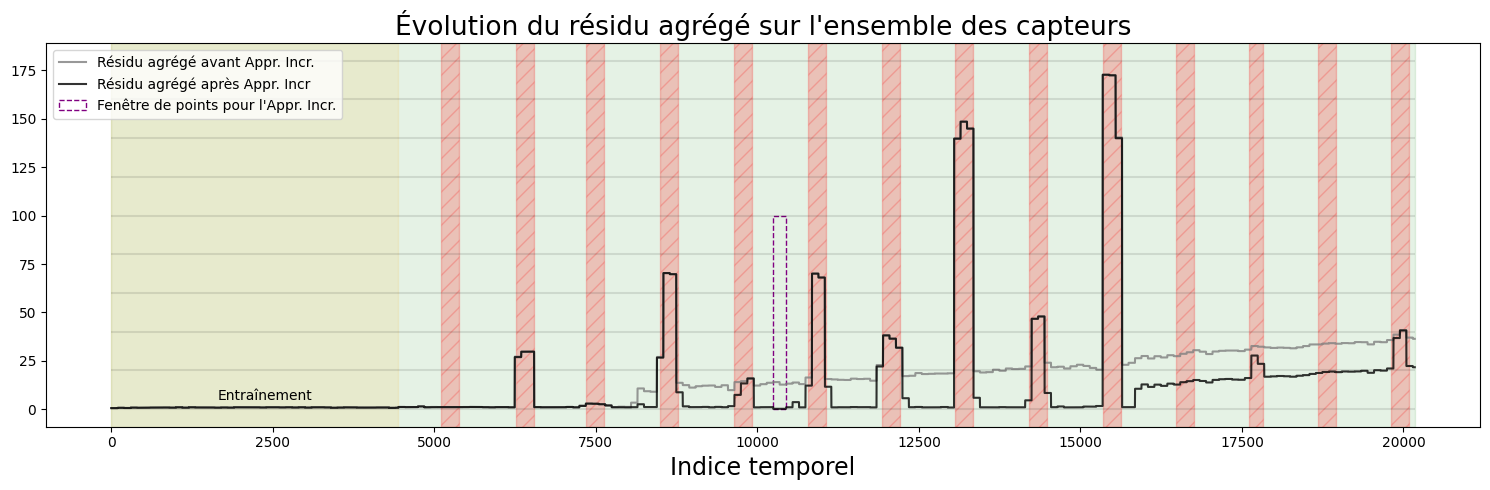

In [8]:
model.partial_fit(df_skab_test.iloc[5800:6000 , :], new_clustering=False)
res_train_post_il = model.predict(df_skab_train)
res_test_post_il = model.predict(df_skab_test)

score_train_postil = utils.aggregate_score(res_train_post_il, res_train_post_il)
score_postil = utils.aggregate_score(res_test_post_il, res_train_post_il)

score_overall_initial = np.concatenate([score_train, score_initial])
score_overall_postil = np.concatenate([score_train_postil, score_postil])

plt.figure(figsize=(15, 5))
plt.plot(score_overall_initial, color='C7', alpha=0.8, label='Résidu agrégé avant Appr. Incr.')
plt.plot(score_overall_postil, color='black', alpha=0.8, label='Résidu agrégé après Appr. Incr')

regions_red = utils.get_events(label_skab)[1]
plt.axvspan(0, score_overall_initial.size, color='green', alpha=0.1)
plt.axvspan(0,score_train.size, color='Orange', alpha=0.1)
for i, region in enumerate(regions_red):
   plt.axvspan(region[0]+score_train.size, region[1]+score_train.size, color='red', alpha=0.2, hatch='//')
plt.xlabel('Indice temporel', fontsize=17)
plt.text(score_train.size/2.7, 5, 'Entraînement')
plt.title("Évolution du résidu agrégé sur l'ensemble des capteurs", fontsize=19)
plt.hlines(0, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(20, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(40, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(60, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(80, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(100, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(120, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(140, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(160, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(180, 0, score_overall_initial.size, color='black', alpha=0.1)

ax = plt.gca()
ax.add_patch(patches.Rectangle((5800+score_train.size, -0.05), 200, 100, edgecolor='purple',
   facecolor='none', linewidth=1,linestyle='--', label="Fenêtre de points pour l'Appr. Incr."))
plt.tight_layout()
plt.legend(loc='upper left')
# plt.savefig('skab_increase_comparaison_french.png', transparent=True, bbox_inches='tight')

plt.show()

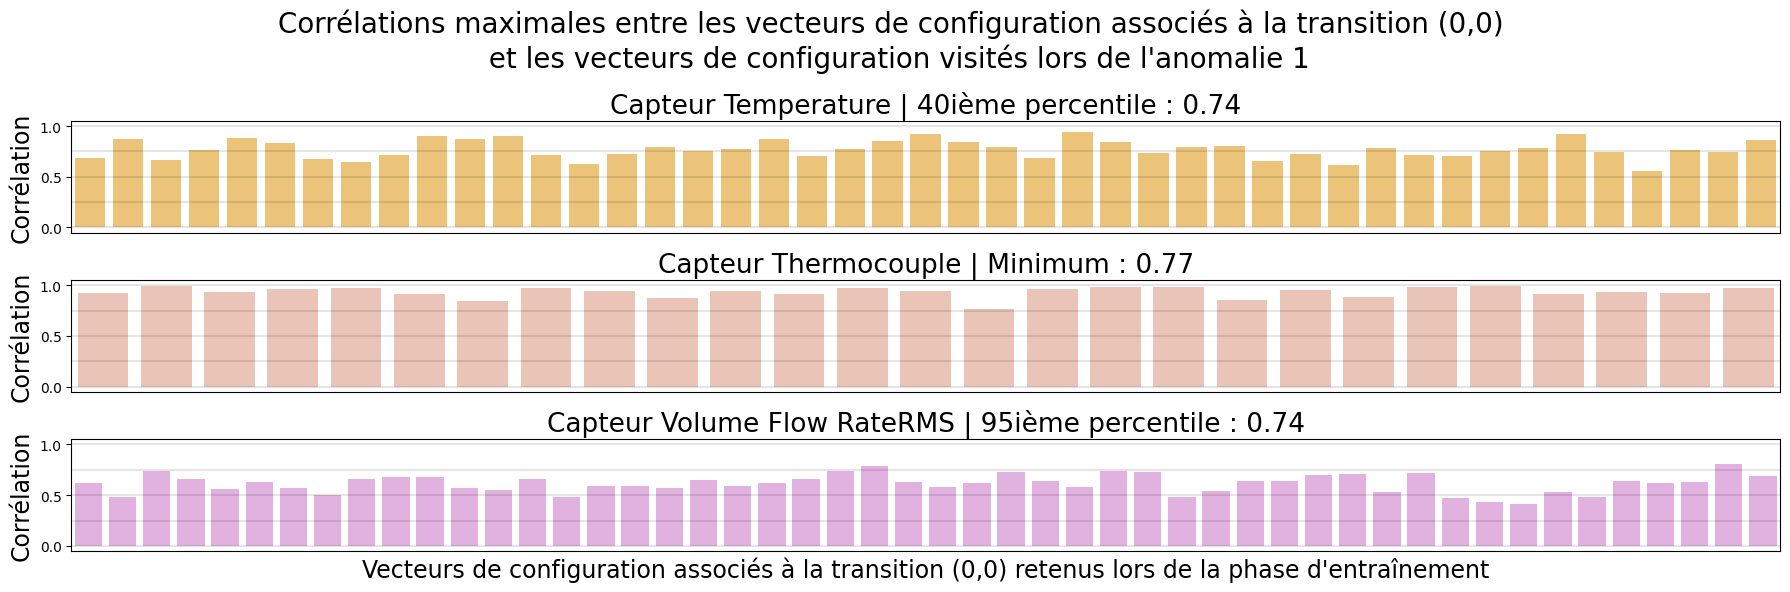

In [9]:
model_tmp = QBoard(
    n_quantiles=8,
    transition_length=20,
    correlation_threshold=0.95,
    bound_threshold=1,
    nu=1,
    window_size=100,
    n_clusters=50
)
model_tmp.fit(df_skab_train)
temp_contexts = model_tmp.params['Temperature']['(0,0)']['context']
thermo_contexts = model_tmp.params['Thermocouple']['(0,0)']['context']
volume_contexts = model_tmp.params['Volume Flow RateRMS']['(0,0)']['context']
model_tmp.forget_transition('Temperature', '(0,0)')
model_tmp.forget_transition('Thermocouple', '(0,0)')
model_tmp.forget_transition('Volume Flow RateRMS', '(0,0)')

model_tmp.partial_fit(df_skab_test.iloc[599+60:1004-60, :])

temp_contexts_ano = model_tmp.params['Temperature']['(0,0)']['context']
thermo_contexts_ano = model_tmp.params['Thermocouple']['(0,0)']['context']
volume_contexts_ano = model_tmp.params['Volume Flow RateRMS']['(0,0)']['context']

plt.figure(figsize=(18,6))
plt.subplot(3, 1, 1)
n1, n2 = len(temp_contexts), len(temp_contexts_ano)
M = np.vstack([temp_contexts, temp_contexts_ano])
sns.barplot(abs(np.corrcoef(M)[0:n1,n1:]).max(axis=1), color='orange', alpha=0.6)
plt.xticks([])
plt.title(f"Capteur Temperature | 40ième percentile : {round(np.quantile(abs(np.corrcoef(M)[0:n1,n1:]).max(axis=1), 0.40), 2)}", fontsize=19)
plt.ylabel('Corrélation', fontsize=17)
plt.ylim([-0.05, 1.05])
plt.axhline(0, color='black', alpha=0.1)
plt.axhline(0.25, color='black', alpha=0.1)
plt.axhline(0.5, color='black', alpha=0.1)
plt.axhline(0.75, color='black', alpha=0.1)
plt.axhline(1, color='black', alpha=0.1)
plt.subplot(3,1,2)
n1, n2 = len(thermo_contexts), len(thermo_contexts_ano)
M = np.vstack([thermo_contexts, thermo_contexts_ano])
sns.barplot(abs(np.corrcoef(M)[0:n1,n1:]).max(axis=1), color='darksalmon', alpha=0.6)
plt.xticks([])
plt.ylabel('Corrélation', fontsize=17)
plt.ylim([-0.05, 1.05])
plt.axhline(0, color='black', alpha=0.1)
plt.axhline(0.25, color='black', alpha=0.1)
plt.axhline(0.5, color='black', alpha=0.1)
plt.axhline(0.75, color='black', alpha=0.1)
plt.axhline(1, color='black', alpha=0.1)
plt.title(f"Capteur Thermocouple | Minimum : {round(np.quantile(abs(np.corrcoef(M)[0:n1,n1:]).max(axis=1), 0.0), 2)}", fontsize=19)
plt.subplot(3,1,3)
n1, n2 = len(volume_contexts), len(volume_contexts_ano)
M = np.vstack([volume_contexts, volume_contexts_ano])
sns.barplot(abs(np.corrcoef(M)[0:n1,n1:]).max(axis=1), color='orchid', alpha=0.6)
plt.xticks([])
plt.ylabel('Corrélation', fontsize=17)
plt.ylim([-0.05, 1.05])
plt.axhline(0, color='black', alpha=0.1)
plt.axhline(0.25, color='black', alpha=0.1)
plt.axhline(0.5, color='black', alpha=0.1)
plt.axhline(0.75, color='black', alpha=0.1)
plt.axhline(1, color='black', alpha=0.1)
plt.title(f"Capteur Volume Flow RateRMS | 95ième percentile : {round(np.quantile(abs(np.corrcoef(M)[0:n1,n1:]).max(axis=1), 0.95), 2)}", fontsize=19)
plt.xlabel("Vecteurs de configuration associés à la transition (0,0) retenus lors de la phase d'entraînement", fontsize=17)
plt.suptitle("Corrélations maximales entre les vecteurs de configuration associés à la transition (0,0) \n"
             +" et les vecteurs de configuration visités lors de l'anomalie 1", fontsize=20)
plt.tight_layout()
# plt.savefig('SKAB_correlation_vectors.png', transparent=True, bbox_inches='tight')

In [10]:
#### DEFIT SKAB QBOARD

model = QBoard(
    n_quantiles=8,
    transition_length=20,
    correlation_threshold=0.95,
    bound_threshold=1,
    nu=1,
    window_size=100,
    n_clusters=50
)
model.fit(df_skab_train)
res_train = model.predict(df_skab_train)
res_test = model.predict(df_skab_test)

score_train = utils.aggregate_score(res_train, res_train)
score_initial = utils.aggregate_score(res_test, res_train)

model2 = copy.deepcopy(model)
model2.partial_defit(df_skab_test.iloc[599:1004, :], 0.99)
res_pdfit_train = model2.predict(df_skab_train)
res_pdfit_test = model2.predict(df_skab_test)

score_train_pdfit_099 = utils.aggregate_score(res_pdfit_train, res_pdfit_train)
score_test_pdfit_099 = utils.aggregate_score(res_pdfit_test, res_pdfit_train)

model2 = copy.deepcopy(model)
model2.partial_defit(df_skab_test.iloc[599:1004, :], 0.90)
res_pdfit_train = model2.predict(df_skab_train)
res_pdfit_test = model2.predict(df_skab_test)

score_train_pdfit_090 = utils.aggregate_score(res_pdfit_train, res_pdfit_train)
score_test_pdfit_090 = utils.aggregate_score(res_pdfit_test, res_pdfit_train)

model2 = copy.deepcopy(model)
model2.partial_defit(df_skab_test.iloc[599:1004, :], 0.75)
res_pdfit_train = model2.predict(df_skab_train)
res_pdfit_test = model2.predict(df_skab_test)

score_train_pdfit_075 = utils.aggregate_score(res_pdfit_train, res_pdfit_train)
score_test_pdfit_075 = utils.aggregate_score(res_pdfit_test, res_pdfit_train)

Thermocouple (0,0)


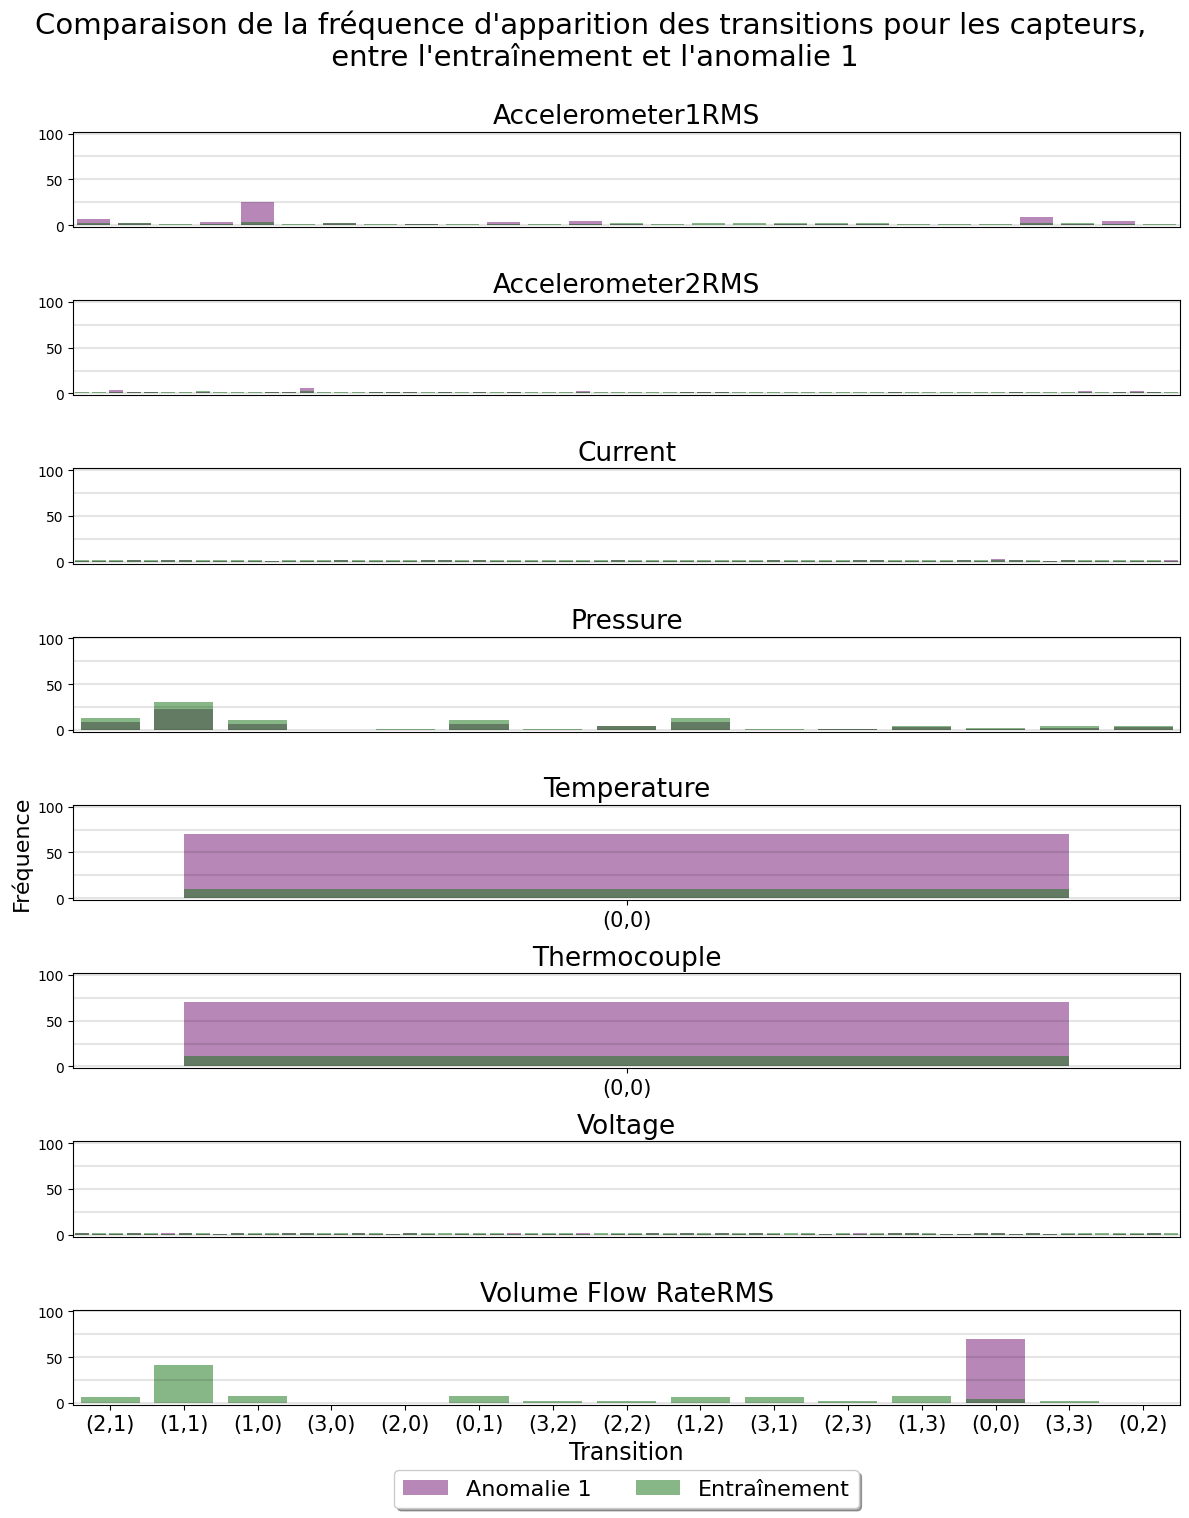

In [11]:
diag = model.partial_defit_diagnosis(df_skab_test.iloc[599:1004, :], pd.concat([df_skab_train, df_skab_test.iloc[:1500, :]]))
diag_ano = model.partial_defit_diagnosis(df_skab_test.iloc[599:1004, :], pd.concat([df_skab_train, df_skab_test.iloc[:1500, :]]))

plt.figure(figsize=(12,15))
for i_s, sensor in enumerate(list(diag.keys())):
    trans_data = pd.DataFrame()
    for key in diag[sensor].keys():
        trans_data[key] = [100*sum(diag[sensor][key][df_skab_train.shape[0] + 599+60:df_skab_train.shape[0]+1004-60])/(1004-599),
            100*sum(diag[sensor][key][:df_skab_train.shape[0]]) / df_skab_train.shape[0]]
    
    ax = plt.subplot(8,1,i_s+1)
    sns.barplot(data=trans_data.iloc[0, :], alpha=0.5, label='Anomalie 1', color='purple')
    sns.barplot(data=trans_data.iloc[1, :], alpha=0.5, label='Entraînement', color='green')
    for j in range(5):
        plt.axhline(y=j*25, color='black', alpha=0.1)
    plt.title(f"{sensor}", fontsize=19)
    plt.ylim([-2, 102])
    if not sensor in ['Temperature', 'Thermocouple', 'Volume Flow RateRMS']:
        plt.xticks([])
    if sensor != "Temperature":
        plt.ylabel('')
    else:
        plt.ylabel('Fréquence', fontsize=16)
    plt.xticks(fontsize=15)
    
    # plt.legend()
plt.xlabel('Transition', fontsize=17)
plt.suptitle("Comparaison de la fréquence d'apparition des transitions pour les capteurs, \n entre l'entraînement et l'anomalie 1 \n", fontsize=21)
plt.tight_layout()
ax.legend(loc='lower center', bbox_to_anchor=(0.5,-1.2), ncol=2, fancybox=True, shadow=True, fontsize=16)
# plt.savefig('skab_transitions_comparison.png', transparent=True, bbox_inches='tight')
plt.show()

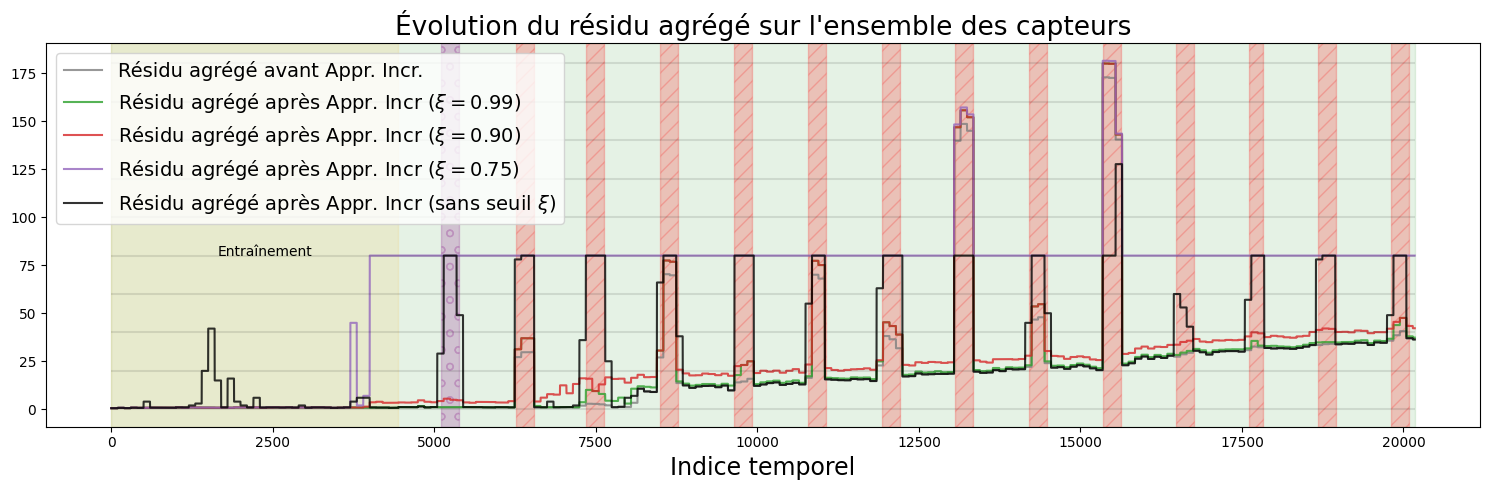

In [12]:
model.forget_transition('Volume Flow RateRMS', '(0,0)')

res_train = model.predict(df_skab_train)
res_test = model.predict(df_skab_test)

score_train_postforget = utils.aggregate_score(res_train, res_train)
score_postforget = utils.aggregate_score(res_test, res_train)

score_overall_initial = np.concatenate([score_train, score_initial])
score_overall_postil = np.concatenate([score_train_postforget, score_postforget])
score_overall_pdfit_099 = np.concatenate([score_train_pdfit_099, score_test_pdfit_099])
score_overall_pdfit_090 = np.concatenate([score_train_pdfit_090, score_test_pdfit_090])
score_overall_pdfit_075 = np.concatenate([score_train_pdfit_075, score_test_pdfit_075])

plt.figure(figsize=(15, 5))
plt.plot(score_overall_initial, color='C7', alpha=0.8, label='Résidu agrégé avant Appr. Incr.')
plt.plot(score_overall_pdfit_099, color='C2', alpha=0.8, label=r'Résidu agrégé après Appr. Incr ($\xi = 0.99$)')
plt.plot(score_overall_pdfit_090, color='C3', alpha=0.8, label=r'Résidu agrégé après Appr. Incr ($\xi = 0.90$)')
plt.plot(score_overall_pdfit_075, color='C4', alpha=0.8, label=r'Résidu agrégé après Appr. Incr ($\xi = 0.75$)')
plt.plot(score_overall_postil, color='black', alpha=0.8, label=r'Résidu agrégé après Appr. Incr (sans seuil $\xi$)')

regions_red = utils.get_events(label_skab)[1]
plt.axvspan(0, score_overall_initial.size, color='green', alpha=0.1)
plt.axvspan(0,score_train.size, color='Orange', alpha=0.1)
plt.axvspan(regions_red[0][0]+score_train.size, regions_red[0][1]+score_train.size, color='purple', alpha=0.2, hatch='o')
for i, region in enumerate(regions_red[1:]):
   plt.axvspan(region[0]+score_train.size, region[1]+score_train.size, color='red', alpha=0.2, hatch='//')
plt.xlabel('Indice temporel', fontsize=17)
plt.text(score_train.size/2.7, 80, 'Entraînement')
plt.title("Évolution du résidu agrégé sur l'ensemble des capteurs", fontsize=19)
plt.hlines(0, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(20, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(40, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(60, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(80, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(100, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(120, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(140, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(160, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.hlines(180, 0, score_overall_initial.size, color='black', alpha=0.1)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=14)
# plt.savefig('skab_decrease_comparaison_french.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
##### FOR BENCH OF CHAPTER 6

df_raw = pd.read_parquet('LorentzAttractor.parquet')
df_train = df_raw.iloc[:int(df_raw.shape[0]//6), :]
df_test = df_raw.iloc[int(df_raw.shape[0]//6):, :]
labels = df_test.label.values

# # For AutoEncoder on Lorenz Attractor
from pyod.models.auto_encoder import AutoEncoder

cols = ['u', 'x1']

Xtrain_win = utils.windowing(df_train.values, 100)
Xtrain = np.zeros((200, 200))
Xtrain[:, :100] = Xtrain_win[0, :, :]
Xtrain[:, 100:] = Xtrain_win[1, :, :]
Xtest_win = utils.windowing(df_test.values, 100)
Xtest = np.zeros((200*5, 200))
Xtest[:, :100] = Xtest_win[0, :, :]
Xtest[:, 100:] = Xtest_win[1, :, :]

hidden_range = [2, 5, 10, 15]
activations = np.array(['relu', 'sigmoid', 'tanh'])
 
seed = 0
epoch = 100

subwins = np.array([5, 10, 20])
win_divs = np.array([20, 10, 5])

for i_sub, subwin in enumerate(subwins):
    win_div = win_divs[i_sub]
    ## Data
    # Train
    Xtrain_win = utils.windowing(df_train[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtrain = np.zeros((int(df_train.shape[0] / subwin), subwin*2))
    Xtrain[:, :subwin] = Xtrain_win[0, :, :]
    Xtrain[:, subwin:] = Xtrain_win[1, :, :]

    Xtest_win = utils.windowing(df_test[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtest = np.zeros((int(df_test.shape[0] / subwin), subwin*2))
    Xtest[:, :subwin] = Xtest_win[0, :, :]
    Xtest[:, subwin:] = Xtest_win[1, :, :]

    for n_neuron in hidden_range:
        layers_config_first_half = [200 - int(i*400/n_neuron) for i in range(n_neuron//2)]
        if n_neuron % 2:
            layers_config = layers_config_first_half + [layers_config_first_half[-1] // 2] + layers_config_first_half[::-1] 
        else:
            layers_config = layers_config_first_half + layers_config_first_half[::-1]

        for hidden_activation in activations:
            model = AutoEncoder(hidden_neuron_list=layers_config, hidden_activation_name=hidden_activation, epoch_num=epoch, random_state=seed, verbose=1)
            model.fit(Xtrain)
            res_train = model.decision_function(Xtrain)
            res_tmp_max = pd.Series(res_train).rolling(win_div).max().dropna().to_numpy()
            res_corr_train = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
            pd.DataFrame(res_corr_train).to_parquet(f'Lorentz_AE_multi_results/Lorentz_AE_train_neurons{n_neuron}_hidactiv{hidden_activation}_subwin{subwin}.parquet')
            res_tmp_test = model.decision_function(Xtest)
            res_tmp_max = pd.Series(res_tmp_test).rolling(win_div).max().dropna().to_numpy()
            res_corr_test = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)   # No sliding
            pd.DataFrame(res_corr_test).to_parquet(f'Lorentz_AE_multi_results/Lorentz_AE_test_neurons{n_neuron}_hidactiv{hidden_activation}.parquet')

#### For LOF on Lorenz Attractor

from pyod.models.lof import LOF
win_size = 100

n_neighors = np.array([5, 20, 50])
algorithms = np.array(['ball_tree', 'kd_tree', 'brute'])

subwins = np.array([1,
    5, 10, 20
    ])
win_divs = np.array([100,
    20, 10, 5
    ])

for i_sub, subwin in enumerate(subwins):
    win_div = win_divs[i_sub]
    ## Data
    # Train
    Xtrain_win = utils.windowing(df_train[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtrain = np.zeros((int(df_train.shape[0] / subwin), subwin*2))
    Xtrain[:, :subwin] = Xtrain_win[0, :, :]
    Xtrain[:, subwin:] = Xtrain_win[1, :, :]

    Xtest_win = utils.windowing(df_test[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtest = np.zeros((int(df_test.shape[0] / subwin), subwin*2))
    Xtest[:, :subwin] = Xtest_win[0, :, :]
    Xtest[:, subwin:] = Xtest_win[1, :, :]


    for n_neighor in n_neighors:
        for algo in algorithms:

            model = LOF(n_neighbors=n_neighor, algorithm=algo)
            model.fit(Xtrain)
            res_tmp = model.decision_function(Xtrain)
            res_tmp_max = pd.Series(res_tmp).rolling(win_div).max().dropna().to_numpy()
            res_corr_x1_train = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
            pd.DataFrame(res_corr_x1_train).to_parquet(f'Lorentz_LOF_multi_results/Lorentz_LOF_train_neighors{n_neighor}_algo{algo}_subwin{subwin}.parquet')
            res_tmp_test = model.decision_function(Xtest)
            res_tmp_max = pd.Series(res_tmp_test).rolling(win_div).max().dropna().to_numpy()
            res_corr_x1_test = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)   # No sliding
            pd.DataFrame(res_corr_x1_test).to_parquet(f'Lorentz_LOF_multi_results/Lorentz_LOF_est_neighors{n_neighor}_algo{algo}_subwin{subwin}.parquet')


#### For LASSO-LARS on Lorenz Attractor
from sklearn.linear_model import LassoLars

win_size = 100
alphas = np.linspace(0.0001, stop=1, num=500)

subwins = np.array([
    5, 10, 20, 
    50, 100])
win_divs = np.array([
    20, 10, 5,
                      2, 1])

for i_sub, subwin in enumerate(subwins):
    win_div = win_divs[i_sub]
    ## Data
    # Train
    Xtrain_win = utils.windowing(df_train[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtrain_x1 = Xtrain_win[0, :, :-1]
    ytrain_x1 = Xtrain_win[0, :, -1]
    Xtrain_u = Xtrain_win[1, :, :-1]
    ytrain_u = Xtrain_win[1, :, -1]

    # Test
    Xtest_win = utils.windowing(df_test[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtest_x1 = Xtest_win[0, :, :-1]
    ytest_x1 = Xtest_win[0, :, -1]
    Xtest_u = Xtest_win[1, :, :-1]
    ytest_u = Xtest_win[1, :, -1]

    # Models mixtes
    Xtrain_corr_x1 = np.zeros((Xtrain_x1.shape[0], subwin*2-1))
    Xtrain_corr_x1[:, :subwin-1] = Xtrain_x1 
    Xtrain_corr_x1[:, subwin-1:] = Xtrain_win[1, :, :]
    ytrain_corr_x1 = ytrain_x1

    Xtest_corr_x1 = np.zeros((Xtest_x1.shape[0], subwin*2-1))
    Xtest_corr_x1[:, :subwin-1] = Xtest_x1 
    Xtest_corr_x1[:, subwin-1:] = Xtest_win[1, :, :]
    ytest_corr_x1 = ytest_x1


    Xtrain_corr_u = np.zeros((Xtrain_u.shape[0], subwin*2-1))
    Xtrain_corr_u[:, :subwin-1] = Xtrain_u
    Xtrain_corr_u[:, subwin-1:] = Xtrain_win[0, :, :]
    ytrain_corr_u = ytrain_u

    Xtest_corr_u = np.zeros((Xtest_u.shape[0], subwin*2-1))
    Xtest_corr_u[:, :subwin-1] = Xtest_u
    Xtest_corr_u[:, subwin-1:] = Xtest_win[0, :, :]
    ytest_corr_u = ytest_u


    for alpha in alphas:

        model_x1_corr = LassoLars(alpha=alpha)
        model_x1_corr.fit(Xtrain_corr_x1, ytrain_corr_x1)
        res_tmp_x1 = np.abs(model_x1_corr.predict(Xtrain_corr_x1) - ytrain_corr_x1)
        res_tmp_max = pd.Series(res_tmp_x1).rolling(win_div).max().dropna().to_numpy()
        res_corr_x1_train = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
        pd.DataFrame(res_corr_x1_train).to_parquet(f'Lorentz_Lasso_multi_results/Lorentz_LassoLars_train_x_alpha{alpha}_subwin{subwin}.parquet')
        res_tmp_x1 = np.abs(model_x1_corr.predict(Xtest_corr_x1) - ytest_x1)
        res_tmp_max = pd.Series(res_tmp_x1).rolling(win_div).max().dropna().to_numpy()
        res_corr_x1 = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
        pd.DataFrame(res_corr_x1).to_parquet(f'Lorentz_Lasso_multi_results/Lorentz_LassoLars_x_alpha{alpha}_subwin{subwin}.parquet')

        model_u_corr = LassoLars(alpha=alpha)
        model_u_corr.fit(Xtrain_corr_u, ytrain_corr_u)
        res_tmp_u = np.abs(model_u_corr.predict(Xtrain_corr_u) - ytrain_corr_u)
        res_tmp_max = pd.Series(res_tmp_u).rolling(win_div).max().dropna().to_numpy()
        res_corr_u_train = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
        pd.DataFrame(res_corr_u_train).to_parquet(f'Lorentz_Lasso_multi_results/Lorentz_LassoLars_train_u_alpha{alpha}_subwin{subwin}.parquet')
        res_tmp_u = np.abs(model_u_corr.predict(Xtest_corr_u) - ytest_u)
        res_tmp_max = pd.Series(res_tmp_u).rolling(win_div).max().dropna().to_numpy()
        res_corr_u = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
        pd.DataFrame(res_corr_u).to_parquet(f'Lorentz_Lasso_multi_results/Lorentz_LassoLars_u_alpha{alpha}_subwin{subwin}.parquet')

#### For RandomForest on Lorenz Attractor
from sklearn.ensemble import RandomForestRegressor

win_size = 100
n_estimators = np.linspace(2, 501, num=10, dtype=int)
criterions = ['squared_error', 'absolute_error', 'friedman_mse']

subwins = np.array([5, 10, 20])
win_divs = np.array([20, 10, 5])

for i_sub, subwin in enumerate(subwins):
    win_div = win_divs[i_sub]
    ## Data
    # Train
    Xtrain_win = utils.windowing(df_train[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtrain_x1 = Xtrain_win[0, :, :-1]
    ytrain_x1 = Xtrain_win[0, :, -1]
    Xtrain_u = Xtrain_win[1, :, :-1]
    ytrain_u = Xtrain_win[1, :, -1]

    # Test
    Xtest_win = utils.windowing(df_test[['x1', 'u']].values, window_size=subwin, sliding=False)
    Xtest_x1 = Xtest_win[0, :, :-1]
    ytest_x1 = Xtest_win[0, :, -1]
    Xtest_u = Xtest_win[1, :, :-1]
    ytest_u = Xtest_win[1, :, -1]

    # Models mixtes
    Xtrain_corr_x1 = np.zeros((Xtrain_x1.shape[0], subwin*2-1))
    Xtrain_corr_x1[:, :subwin-1] = Xtrain_x1 
    Xtrain_corr_x1[:, subwin-1:] = Xtrain_win[1, :, :]
    ytrain_corr_x1 = ytrain_x1

    Xtest_corr_x1 = np.zeros((Xtest_x1.shape[0], subwin*2-1))
    Xtest_corr_x1[:, :subwin-1] = Xtest_x1 
    Xtest_corr_x1[:, subwin-1:] = Xtest_win[1, :, :]
    ytest_corr_x1 = ytest_x1


    Xtrain_corr_u = np.zeros((Xtrain_u.shape[0], subwin*2-1))
    Xtrain_corr_u[:, :subwin-1] = Xtrain_u
    Xtrain_corr_u[:, subwin-1:] = Xtrain_win[0, :, :]
    ytrain_corr_u = ytrain_u

    Xtest_corr_u = np.zeros((Xtest_u.shape[0], subwin*2-1))
    Xtest_corr_u[:, :subwin-1] = Xtest_u
    Xtest_corr_u[:, subwin-1:] = Xtest_win[0, :, :]
    ytest_corr_u = ytest_u


    for n_estimator in n_estimators:
        for criterion in criterions:

            model_x1_corr = RandomForestRegressor(n_estimators=n_estimator, criterion=criterion)
            model_x1_corr.fit(Xtrain_corr_x1, ytrain_corr_x1)
            res_tmp_x1 = np.abs(model_x1_corr.predict(Xtrain_corr_x1) - ytrain_corr_x1)
            res_tmp_max = pd.Series(res_tmp_x1).rolling(win_div).max().dropna().to_numpy()
            res_corr_x1_train = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
            pd.DataFrame(res_corr_x1_train).to_parquet(f'Lorentz_RF_multi_results/Lorentz_RF_train_x_nestim{n_estimator}_criterion{criterion}_subwin{subwin}.parquet')
            res_tmp_x1 = np.abs(model_x1_corr.predict(Xtest_corr_x1) - ytest_x1)
            res_tmp_max = pd.Series(res_tmp_x1).rolling(win_div).max().dropna().to_numpy()
            res_corr_x1 = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
            pd.DataFrame(res_corr_x1).to_parquet(f'Lorentz_RF_multi_results/Lorentz_RF_x_nestim{n_estimator}_criterion{criterion}_subwin{subwin}.parquet')

            model_u_corr = RandomForestRegressor(n_estimators=n_estimator, criterion=criterion)
            model_u_corr.fit(Xtrain_corr_u, ytrain_corr_u)
            res_tmp_u = np.abs(model_u_corr.predict(Xtrain_corr_u) - ytrain_corr_u)
            res_tmp_max = pd.Series(res_tmp_u).rolling(win_div).max().dropna().to_numpy()
            res_corr_u_train = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
            pd.DataFrame(res_corr_u_train).to_parquet(f'Lorentz_RF_multi_results/Lorentz_RF_train_u_nestim{n_estimator}_criterion{criterion}_subwin{subwin}.parquet')
            res_tmp_u = np.abs(model_u_corr.predict(Xtest_corr_u) - ytest_u)
            res_tmp_max = pd.Series(res_tmp_u).rolling(win_div).max().dropna().to_numpy()
            res_corr_u = np.repeat(np.concatenate([np.repeat(res_tmp_max[0], win_div-1), res_tmp_max]), subwin)  # No sliding
            
            pd.DataFrame(res_corr_u).to_parquet(f'Lorentz_RF_multi_results/Lorentz_RF_x_nestim{n_estimator}_criterion{criterion}_subwin{subwin}.parquet')

OSError: Cannot save file into a non-existent directory: 'Lorentz_LOF_multi_results'